In [1]:
import time
import random
import matplotlib.pyplot as plt
import copy

In [2]:
# original solution
# NOTE: incorrectly denoted n^2 originally thinking of square matrices
class UnsortedMatrix1:
  def __init__(self, matrix):
    # initialize the matrix
    self.matrix = matrix
    #store rows and columns
    self.rows = len(matrix) #"m"
    self.cols = len(matrix[0]) # "n"

  def find(self, value):
    # Time: O(m * n)
    # Space: O(1)
    for r in range(self.rows):
      for c in range(self.cols):
        if self.matrix[r][c] == value:
          return True
    return False

  def replace(self, row, col, value):
    #Time: O(1)
    #Space: O(1)
    if self.valid(row, col):
      self.matrix[row][col] = value
    else:
      print("Invalid row or column")

  def valid(self, row, col):
    #Time: O(1)
    #Space: O(1)
    return 0 <= row < self.rows and 0 <= col < self.cols

Generate Simple Tester Code

In [3]:
def test_usorted_matrix(unsorted_matrix):
  output = []
  output.append(unsorted_matrix.find(10))
  #returns True

  unsorted_matrix.replace(1, 1, 100)

  output.append(unsorted_matrix.find(10))
  #returns False

  unsorted_matrix.replace(20, 10, 0)

  print(output)
  return output == [True, False]

In [4]:
unsorted_matrix = [[3, 8, 1], [2, 10, 9], [6, 12, 4], [20, 19, 0]]
test_usorted_matrix(UnsortedMatrix1(copy.deepcopy(unsorted_matrix)))

Invalid row or column
[True, False]


True

Modified, optimal implementation of "find" using binary search. NOTE: optimizing find leads to WORSE performance in replace to keep the "nums" array updated correctly at small m and n  but will fall into an equivalence class at sufficiently large m and n

In [5]:
class UnsortedMatrix2:
  def __init__(self, matrix):
    # initialize the matrix
    self.matrix = matrix
    #store rows and columns
    self.rows = len(matrix) #"m"
    self.cols = len(matrix[0]) # "n"

    # keep track of ordering in unsorted array
    self.nums = [] # O(m * n)
    self.insert_into_nums()

  def insert_into_nums(self):
    #Time: O(m * n * log(m * n))
    # Space: allocating O(m * n) for nums
    for r in range(self.rows):
      for c in range(self.cols):
        idx = self.binary_search(self.matrix[r][c])
        self.nums.insert(idx, self.matrix[r][c])

  def binary_search(self, value):
    # Time: O(log(m * n))
    # Space: O(1)
    if not self.nums:
      # edge case nums is not populated yet
      return 0

    # simple binary search
    l, r = 0, len(self.nums) - 1
    while l <= r:
      m = l + (r - l) // 2
      if self.nums[m] == value:
        # found insertion point of repeated value
        return m
      elif self.nums[m] < value:
        l = m + 1
      else:
        r = m - 1
    # found necessary insertion point in nums
    return l

  def find(self, value):
    # Time: O(log(m * n))
    # Space: O(1)
    idx = self.binary_search(value)
    return idx < len(self.nums) and self.nums[idx] == value

  def replace(self, row, col, value):
    #Time: O(m * n + log(m * n))
    #Space: O(1)
    if self.valid(row, col):
      idx = self.binary_search(self.matrix[row][col]) #O(log(m * n))
      if idx < len(self.nums) and self.nums[idx] == self.matrix[row][col]:
        del self.nums[idx] # O(m * n)
      self.nums.insert(self.binary_search(value), value) #O(log(m * n))
      self.matrix[row][col] = value
    else:
      print("Invalid row or column")

  def valid(self, row, col):
    #Time: O(1)
    #Space: O(1)
    return 0 <= row < self.rows and 0 <= col < self.cols

Test Code:

In [6]:
test_usorted_matrix(UnsortedMatrix2(copy.deepcopy(unsorted_matrix)))

Invalid row or column
[True, False]


True

Let's test for runtime improvement. Expected Results: better find performance than UnsortedMatrix1 implementation, but better runtime performance for "replace". NOTE: for sufficiently large inputs the O(m*n + log(m*n)) time complexity approaches O(m*n) making the algorithm comprarable for sufficiently large m,n.

In [7]:
def genRandomMat(m, n, min_val=-100, max_val=100):
  #Time: O(m * n)
  #Space: O(m * n)
  #create a random matrix of given dimensions m and n
  return [[random.randint(min_val, max_val) for _ in range(n)] for _ in range(m)]

In [8]:
def genRuntimePlotPerFunction():
  # keep track of random matrices
  unsorted1 = []
  unsorted2 = []

  mat_sizes = []
  # create test data
  for m in range(1, 10):
    for n in range(1, 10):
      mat = genRandomMat(m, n)
      unsorted1.append(UnsortedMatrix1(copy.deepcopy(mat)))
      unsorted2.append(UnsortedMatrix2(copy.deepcopy(mat)))
      if (m * n) not in mat_sizes:
        mat_sizes.append(m * n)

  # keep track of runtimes per matrix type
  runtime_find_unsorted1 = []
  runtime_find_unsorted2 = []
  runtime_replace_unsorted1 = []
  runtime_replace_unsorted2 = []

  # time the functions
  for m1, m2 in zip(unsorted1, unsorted2):
    # dummy matrices for averages
    u1_find_time = []
    u2_find_time = []
    u1_replace_time = []
    u2_replace_time = []
    for _ in range(100):
      # conduct test on unsorted1 class for find
      start_time = time.time()
      m1.find(random.randint(-100, 100))
      end_time = time.time()
      u1_find_time.append(end_time - start_time)

      # conduct test on unsorted2 class for find
      start_time = time.time()
      m2.find(random.randint(-100, 100))
      end_time = time.time()
      u2_find_time.append(end_time - start_time)

      # conduct test on unsorted1 class for replace
      start_time = time.time()
      m1.replace(random.randint(0, m1.rows - 1), random.randint(0, m1.cols - 1), random.randint(-100, 100))
      end_time = time.time()
      u1_replace_time.append(end_time - start_time)

      # conduct test for unsorted2 replace
      start_time = time.time()
      m2.replace(random.randint(0, m2.rows - 1), random.randint(0, m2.cols - 1), random.randint(-100, 100))
      end_time = time.time()
      u2_replace_time.append(end_time - start_time)

    # calculate averages
    runtime_find_unsorted1.append(sum(u1_find_time) / 100)
    runtime_find_unsorted2.append(sum(u2_find_time) / 100)
    runtime_replace_unsorted1.append(sum(u1_replace_time) / 100)
    runtime_replace_unsorted2.append(sum(u2_replace_time) / 100)


  # edit the dimensions of the output in proportion to each other
  plt.figure(figsize=(12, 6))
  # find "find" Runtime
  plt.subplot(1, 2, 1)
  plt.plot(runtime_find_unsorted1, label='UnsortedMatrix1 - Find', linestyle='-', marker='o')
  plt.plot(runtime_find_unsorted2, label='UnsortedMatrix2 - Find', linestyle='-', marker='s')
  plt.xlabel("M * N")
  plt.ylabel("Time (seconds)")
  plt.title("Find Operation Runtime Comparison")
  plt.legend()

   # find "replace" runtime
  plt.subplot(1, 2, 2)  # Second plot in the same figure
  plt.plot(runtime_replace_unsorted1, label='UnsortedMatrix1 - Replace', linestyle='-', marker='o')
  plt.plot(runtime_replace_unsorted2, label='UnsortedMatrix2 - Replace', linestyle='-', marker='s')
  plt.xlabel("M * N")
  plt.ylabel("Time (seconds)")
  plt.title("Replace Operation Runtime Comparison")
  plt.legend()

  plt.show()


Plots for optimized efficiency. Here UnsortedMatrix1 should be suboptimal in the "find" operation and UnsortedMatrix2 is optimal. Also UnsortedMatrix1 should be optimal in terms of replace whereas UnsortedMatrix2 is suboptimal

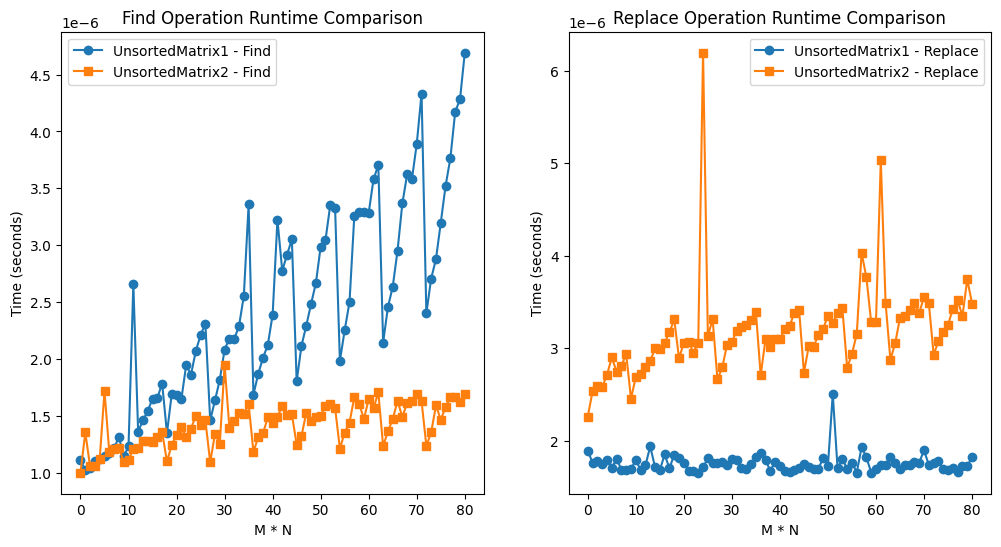

In [10]:
genRuntimePlotPerFunction()

Our findings model our theory, and therefore for small sized inputs, there is a performance tradeoff between approach 1 versus approach 2 depending on the desire for increased find or replace performance with smaller m,n. Further areas of interest could be making m,n sufficiently large to show the change of optimization and at large enough m,n performance is negligible. Showing this change would take hours of running simulations! But I'd be happy to provide the work if that interests you.

Thank you for a great interview! Hope to be in touch soon.